In [1]:
import time 

from IPython.core.display import display
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import numpy as np
import seaborn as sns
sns.set(font='Osaka')
import pandas as pd

t0 = time.time()
data_dir = '../data/'
file = 'df_item_transaction.csv'
df_item_transaction = pd.read_csv(data_dir + file)
print('Load in ', time.time() - t0)

Load in  0.9390599727630615


In [2]:
df_item_transaction['InvoiceDate'] = \
pd.to_datetime(df_item_transaction['InvoiceDate'])

In [3]:
# Time series analysis

# Sales
df_ts = \
pd.DataFrame(df_item_transaction.groupby(pd.Grouper(key='InvoiceDate', freq='MS'))['Sales'].sum())

# Quantity
df_ts['Quantity'] = \
pd.DataFrame(df_item_transaction.groupby(pd.Grouper(key='InvoiceDate', freq='MS'))['Quantity'].sum())

# #ofTransactions
df_ts['#ofTransactions'] = \
pd.DataFrame(df_item_transaction.groupby(pd.Grouper(key='InvoiceDate', freq='MS'))['InvoiceNo'].nunique())

# Sales / Quantity
df_ts['SalesPerQuantity'] = df_ts['Sales'] / df_ts['Quantity']

# Quantity / Transaction
df_ts['QuantityPerTransaction'] = df_ts['Quantity'] / df_ts['#ofTransactions']

display(df_ts.head())

,Sales,Quantity,#ofTransactions,SalesPerQuantity,QuantityPerTransaction
InvoiceDate,,,,,
2010-12-01,778025.910,358753,1551,2.168695,231.304320
2011-01-01,672007.410,387428,1082,1.734535,358.066543
2011-02-01,508952.870,283251,1093,1.796826,259.150046
2011-03-01,691265.940,377110,1440,1.833062,261.881944
2011-04-01,516354.791,308520,1237,1.673651,249.409863


/Users/fujiki/anaconda3/envs/DataScience/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['Osaka'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


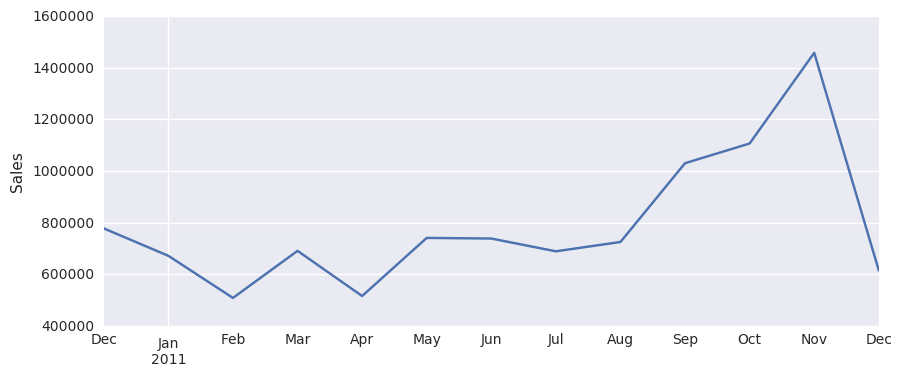

In [4]:
figsize = (10, 4)
y = 'Sales'
df_ts[y].plot(figsize=figsize)
plt.xlabel('')
plt.ylabel(y)
plt.show()